<a id='top'></a>
<img align="center" src="https://st3.depositphotos.com/1003098/16777/i/600/depositphotos_167772606-stock-photo-ground-crew-signaling-to-airplane.jpg" width="200" />
<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Аналитика в авиакомпании</b>
    </font>
</p>

# Содержание

<a href='#section_0'>Описание проекта</a>

<a href='#section_1'>Аналитика</a>

<a href='#section_2'>Общий вывод</a>

<a href='#section_end'>Чек-лист проверки</a>

<a id='section_0'></a>
# Описание проекта
Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


<a id='section_1'></a>
# Аналитика

In [1]:
!pip install bs4 --quiet
!pip install folium --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import folium

In [2]:
# Посмотрим на данные

query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3.average_flights = query_3.average_flights.round(decimals=2)
query_3

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


In [5]:
# Проверим типы данных на корректность

query_1.info()
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


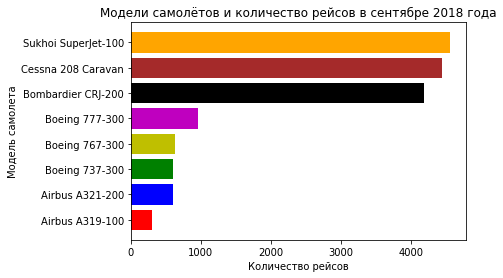

In [6]:
# Посторим график "Модели самолётов и количество рейсов"

fig, ax = plt.subplots()

ax.barh(query_1.model, query_1.flights_amount.sort_values(), color=['r','b','g','y','m','k','brown','orange'], align='center')
ax.set_yticklabels(query_1.model)
ax.set_xlabel('Количество рейсов')
ax.set_ylabel('Модель самолета')
ax.set_title("Модели самолётов и количество рейсов в сентябре 2018 года")

plt.show()

#### Вывод
* Топ-3 самолетов, летающих на регулярных рейсах компании F9, небольшой вместительности, очевидно для региональных перевозок между небольшими городами
* Рейсы крупных самолетов не так часты и производятся при болльших пассажиропотоках между областными центрами

In [7]:
# Для визуализации количетсва рейсов по городам 
# найдем информацию о координатах крупнейших городов России

url = 'http://alextyurin.ru/2014/04/%D0%B3%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5-%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D1%8B-%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85/'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')
table = soup.find_all('table')[0]
rows = table.find_all('tr')

field_list = []
for i in range(3):
    col = []
        # add header
    col.append(rows[0].find_all('th')[i].get_text().strip())
        # start with second row as first one was taken earlier
    for row in rows[1:]:
        try:
            r = row.find_all('td')
            col.append(r[i].get_text().strip())
        except:
            pass
    field_list.append(col)
    
d = dict()
for i in range(3):
    d[field_list[i][0]] = field_list[i][1:]
    
city_geo_data = pd.DataFrame(d)
city_geo_data = city_geo_data.rename(columns={'Город': 'city', 
                                              'Широта': 'latitude', 
                                              'Долгода': 'longitude'})

city_geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
city         90 non-null object
latitude     90 non-null object
longitude    90 non-null object
dtypes: object(3)
memory usage: 2.2+ KB


In [8]:
# Приведем данные полученной таблицы к корректным типам

convert_dict = {'city': str,
                'latitude': float,
                'longitude': float
               }
  
city_geo_data = city_geo_data.astype(convert_dict)
city_geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
city         90 non-null object
latitude     90 non-null float64
longitude    90 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


In [9]:
# Объединим таблицы методом merge по столбцу 'city'

query_3_geodata = query_3.merge(city_geo_data, how='left', on='city').dropna().reset_index(drop=True)
query_3_geodata

,city,average_flights,latitude,longitude
0,Абакан,3.87,53.720976,91.442423
1,Архангельск,5.35,64.539304,40.518735
2,Астрахань,2.45,46.347869,48.033574
3,Барнаул,2.61,53.356132,83.749620
4,Белгород,6.00,50.597467,36.588849
5,Благовещенск,1.00,50.290658,127.527173
6,Братск,1.00,56.151382,101.634152
7,Брянск,10.00,53.243400,34.364198
8,Владивосток,3.00,43.134019,131.928379
9,Владикавказ,2.00,43.024122,44.690476


In [10]:
# Посторим график "Города и количество рейсов" с использованием пакета Folium

m = folium.Map(location=[46.347869, 48.033574], tiles="Stamen Toner", zoom_start=2)

for i in range(len(query_3_geodata)):
    folium.CircleMarker(
        radius=query_3_geodata.average_flights[i]/4,
        location=[query_3_geodata.latitude[i], query_3_geodata.longitude[i]],
        popup=[query_3_geodata.city[i], query_3_geodata.average_flights[i]],
        color="blue",
        fill=True,
    ).add_to(m)

m

#### Вывод
* На карте показано среднее количество рейсов, совершаемых в города России. Большинство рейсов приходится на европейскую часть России

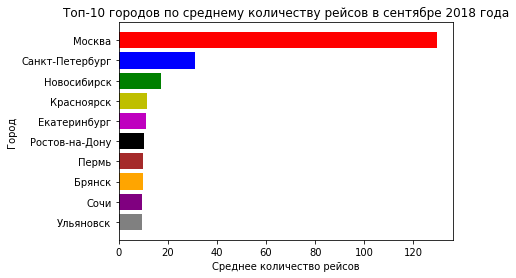

In [11]:
# Посторим график "Топ-10 городов и количество рейсов"

top_100 = query_3.sort_values('average_flights', ascending=False).reset_index(drop=True).head(10)

fig, ax = plt.subplots()

ax.barh(top_100.city, top_100.average_flights, color=['r','b','g','y','m','k','brown','orange','purple','gray'], align='center')
ax.set_yticklabels(top_100.city)
ax.invert_yaxis()
ax.set_xlabel('Среднее количество рейсов')
ax.set_ylabel('Город')
ax.set_title("Топ-10 городов по среднему количеству рейсов в сентябре 2018 года")

plt.show()

#### Вывод
* Самыми популярными для посещения городами являются Москва и северная столица - безусловные лидеры в проведении крупнейших культурных фестивалей.

<a href='#top'>Back to top</a>

<a id='section_2'></a>
# Общий вывод
* Большинство рейсов в России выполняется небольшими самолетами на региональных перевозках
* Крупные воздушные суда используются реже, что вероятно связано с обслуживанием пассажиропотоков заграницу, а также между областными центрами и столицей
* Самыми популярными для посещения городами являются Москва и северная столица. Далее следуют крупнейшие города Сибири - Красноярск и Новосибирск, далее следуют уральцы
* Значительный перевес по количеству рейсов в столицу можно объяснить, тем, что многие рейсы проходят с пересадкой в Москве

<a href='#top'>Back to top</a>